In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'C:/Users/Adlina/Desktop/Master in THD/SEM 1 Summer 23_24/Advanced Robotics/Recorded Data Stanley/'

In [2]:
# Kappa = 2 Velocity = 0.8 - 3
file_pathA = 'Stanley Kappa=2 Velocity/'
file_name1 = '3wrobotNI_Stanley_CTRL_V=0.8_K=2.csv'
file_name2 = '3wrobotNI_Stanley_CTRL_V=1_K=2.csv'
file_name3 = '3wrobotNI_Stanley_CTRL_V=2.2_K=2.csv'
file_name4 = '3wrobotNI_Stanley_CTRL_V=2_K=2.csv'
file_name5 = '3wrobotNI_Stanley_CTRL_V=3_K=2.csv'

In [ ]:
# Kappa = 1.2-3 Velocity = 2
file_pathA = 'Stanley Velocity=2 Kappa/'
file_name1 = '3wrobotNI_Stanley_CTRL_V=2_K=1.2.csv'
file_name2 = '3wrobotNI_Stanley_CTRL_V=2_K=1.5.csv'
file_name3 = '3wrobotNI_Stanley_CTRL_V=2_K=2.csv'
file_name4 = '3wrobotNI_Stanley_CTRL_V=2_K=3.csv'

In [3]:
file_path1 = "".join([file_path, file_pathA, file_name1])
file_path2 = "".join([file_path, file_pathA, file_name2])
file_path3 = "".join([file_path, file_pathA, file_name3])
file_path4 = "".join([file_path, file_pathA, file_name4])

df1 = pd.read_csv(file_path1, skiprows=15)
df2 = pd.read_csv(file_path2, skiprows=15)
df3 = pd.read_csv(file_path3, skiprows=15)
df4 = pd.read_csv(file_path4, skiprows=15)

In [ ]:
# df1.head(5)
# df5.tail(5)
# df1.info()
# df5.describe()

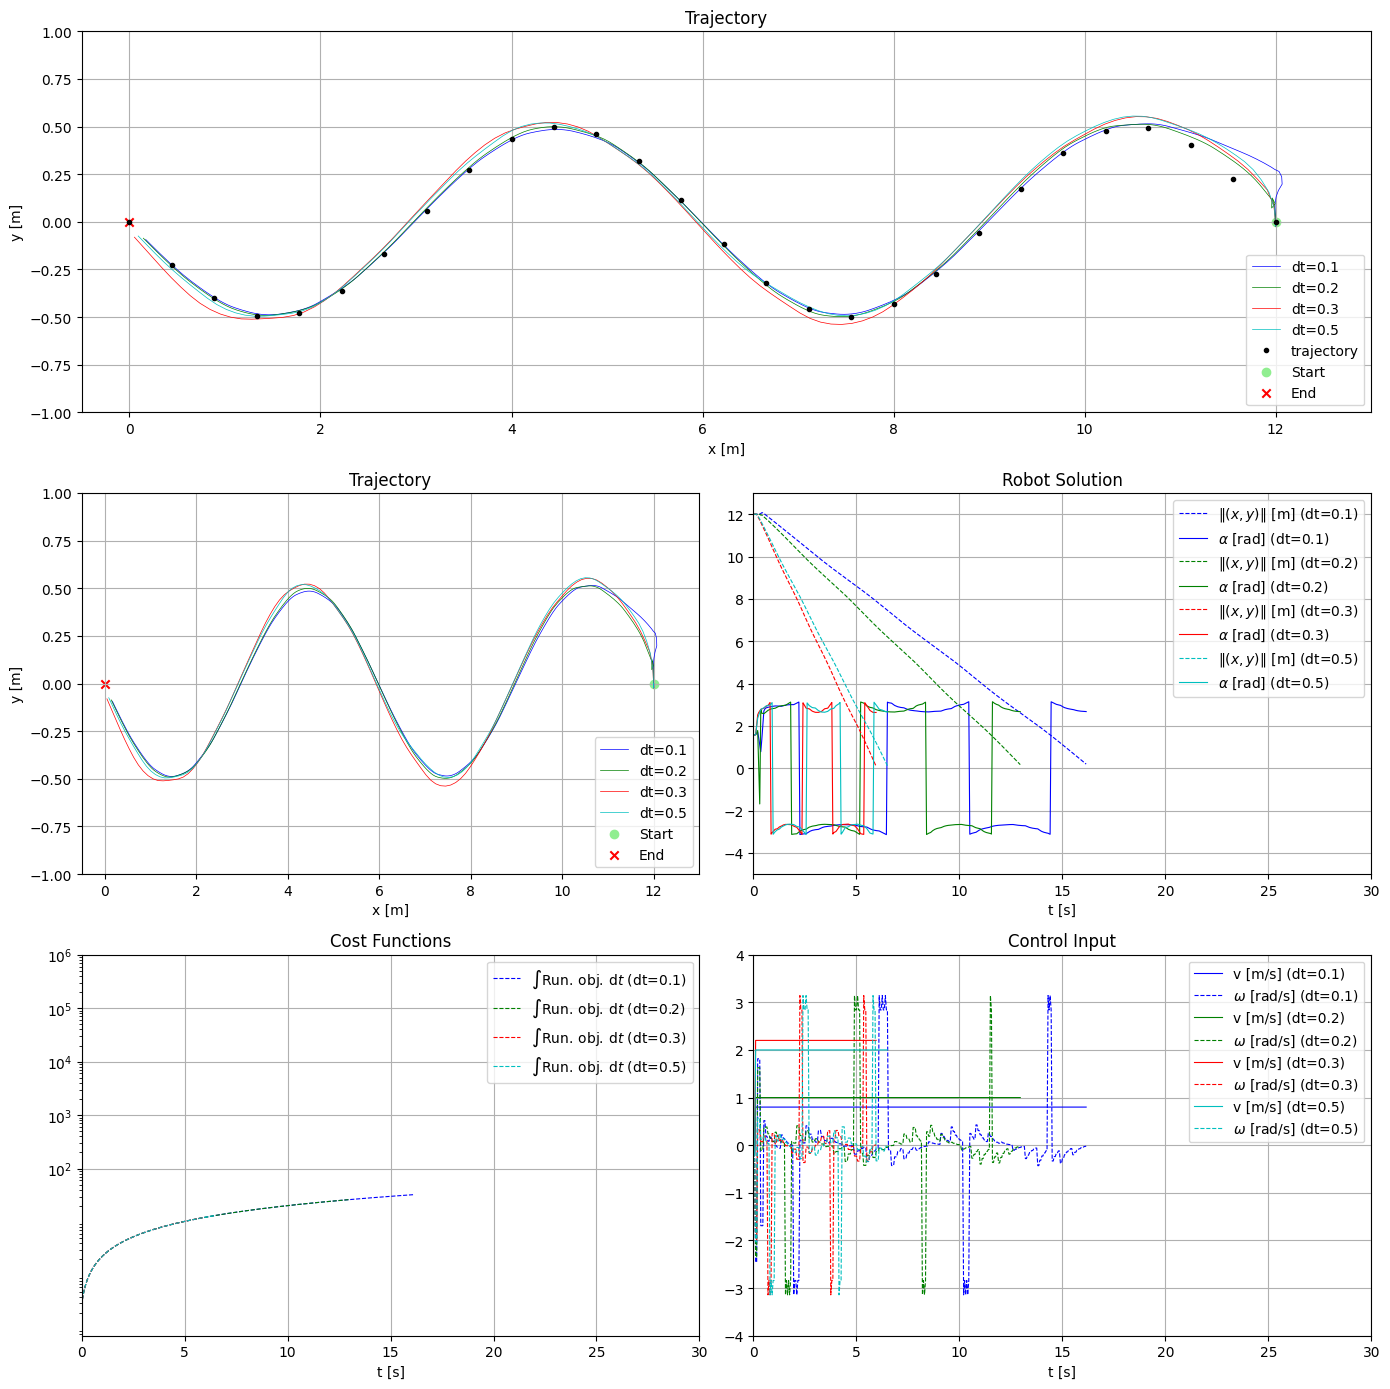

In [4]:
# Plot settings
fig = plt.figure(figsize=(14, 14))

class Stanley_CTRL:
    def __init__(self, state_init):
        self.kappa_delta = 3.2
        self.way_points = self._generate_trajectory(state_init[0], state_init[1], 28)
        self.last_way_point = 0

    def _generate_trajectory(self, x_0, y_0, n):
        x = np.linspace(x_0, 0, n)
        error_x = np.linspace(0, 4 * np.pi, n)
        error_y = np.sin(error_x) * 0.5  # Reduce amplitude if necessary
        m = y_0 / x_0
        y = m * x + error_y
        theta = np.zeros(n)
        for i in range(1, n):
            theta[i] = np.arctan2(y[i] - y[i - 1], x[i] - x[i - 1])
        return [x, y, theta]

state_init = [12, 0]  # Example initial state [x, y]
# Instantiate the Stanley_CTRL class
trajectory = Stanley_CTRL(state_init)

# Plot Trajectory (top-left)Big
plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=1)
plt.plot(df1['x [m]'], df1['y [m]'], 'b-', lw=0.5, label='dt=0.1')
plt.plot(df2['x [m]'], df2['y [m]'], 'g-', lw=0.5, label='dt=0.2')
plt.plot(df3['x [m]'], df3['y [m]'], 'r-', lw=0.5, label='dt=0.3')
plt.plot(df4['x [m]'], df4['y [m]'], 'c-', lw=0.5, label='dt=0.5')
plt.plot(trajectory.way_points[0], trajectory.way_points[1], 'k.', lw=1, label='trajectory')
plt.scatter(df1['x [m]'].iloc[0], df1['y [m]'].iloc[0], marker='o', color='lightgreen', label='Start')
plt.scatter(0, 0, marker='x', color='r', label='End')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Trajectory')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(-0.5, 13)
plt.ylim(-1, 1)

# Plot Trajectory (top-left)
plt.subplot(3, 2, 3)
plt.plot(df1['x [m]'], df1['y [m]'], 'b-', lw=0.5, label='dt=0.1')
plt.plot(df2['x [m]'], df2['y [m]'], 'g-', lw=0.5, label='dt=0.2')
plt.plot(df3['x [m]'], df3['y [m]'], 'r-', lw=0.5, label='dt=0.3')
plt.plot(df4['x [m]'], df4['y [m]'], 'c-', lw=0.5, label='dt=0.5')
plt.scatter(df1['x [m]'].iloc[0], df1['y [m]'].iloc[0], marker='o', color='lightgreen', label='Start')
plt.scatter(0, 0, marker='x', color='r', label='End')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Trajectory')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(-0.5, 13)
plt.ylim(-1, 1)

# Plot Norm and Alpha (top-right)
plt.subplot(3, 2, 4)
plt.plot(df1['t [s]'], np.linalg.norm([df1['x [m]'], df1['y [m]']], axis=0), 'b--', lw=0.8, label=r'$\Vert(x,y)\Vert$ [m] (dt=0.1)')
plt.plot(df1['t [s]'], df1['alpha [rad]'], 'b-', lw=0.8, label=r'$\alpha$ [rad] (dt=0.1)')
plt.plot(df2['t [s]'], np.linalg.norm([df2['x [m]'], df2['y [m]']], axis=0), 'g--', lw=0.8, label=r'$\Vert(x,y)\Vert$ [m] (dt=0.2)')
plt.plot(df2['t [s]'], df2['alpha [rad]'], 'g-', lw=0.8, label=r'$\alpha$ [rad] (dt=0.2)')
plt.plot(df3['t [s]'], np.linalg.norm([df3['x [m]'], df3['y [m]']], axis=0), 'r--', lw=0.8, label=r'$\Vert(x,y)\Vert$ [m] (dt=0.3)')
plt.plot(df3['t [s]'], df3['alpha [rad]'], 'r-', lw=0.8, label=r'$\alpha$ [rad] (dt=0.3)')
plt.plot(df4['t [s]'], np.linalg.norm([df4['x [m]'], df4['y [m]']], axis=0), 'c--', lw=0.8, label=r'$\Vert(x,y)\Vert$ [m] (dt=0.5)')
plt.plot(df4['t [s]'], df4['alpha [rad]'], 'c-', lw=0.8, label=r'$\alpha$ [rad] (dt=0.5)')
plt.xlabel('t [s]')
plt.title('Robot Solution')
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0, 30)
plt.ylim(-5, 13)

# Plot Accumulated Cost
plt.subplot(3, 2, 5)
plt.plot(df1['t [s]'], df1['accum_obj'], 'b--', lw=0.8, label=r'$\int \mathrm{Run.\,obj.} \,\mathrm{d}t$ (dt=0.1)')
plt.plot(df2['t [s]'], df2['accum_obj'], 'g--', lw=0.8, label=r'$\int \mathrm{Run.\,obj.} \,\mathrm{d}t$ (dt=0.2)')
plt.plot(df3['t [s]'], df3['accum_obj'], 'r--', lw=0.8, label=r'$\int \mathrm{Run.\,obj.} \,\mathrm{d}t$ (dt=0.3)')
plt.plot(df4['t [s]'], df4['accum_obj'], 'c--', lw=0.8, label=r'$\int \mathrm{Run.\,obj.} \,\mathrm{d}t$ (dt=0.5)')
plt.xlabel('t [s]')
plt.title('Cost Functions')
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0, 30)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.yticks([10**i for i in range(2, 7)])  # Set y-axis ticks at powers of 10 from 10^0 to 10^6

# Plot Control inputs
plt.subplot(3, 2, 6)
plt.plot(df1['t [s]'], df1['v [m/s]'], 'b-', lw=0.8, label='v [m/s] (dt=0.1)')
plt.plot(df1['t [s]'], df1['omega [rad/s]'], 'b--', lw=0.8, label=r'$\omega$ [rad/s] (dt=0.1)')
plt.plot(df2['t [s]'], df2['v [m/s]'], 'g-', lw=0.8, label='v [m/s] (dt=0.2)')
plt.plot(df2['t [s]'], df2['omega [rad/s]'], 'g--', lw=0.8, label=r'$\omega$ [rad/s] (dt=0.2)')
plt.plot(df3['t [s]'], df3['v [m/s]'], 'r-', lw=0.8, label='v [m/s] (dt=0.3)')
plt.plot(df3['t [s]'], df3['omega [rad/s]'], 'r--', lw=0.8, label=r'$\omega$ [rad/s] (dt=0.3)')
plt.plot(df4['t [s]'], df4['v [m/s]'], 'c-', lw=0.8, label='v [m/s] (dt=0.5)')
plt.plot(df4['t [s]'], df4['omega [rad/s]'], 'c--', lw=0.8, label=r'$\omega$ [rad/s] (dt=0.5)')
plt.xlabel('t [s]')
plt.title('Control Input')
plt.legend(loc='upper right')
plt.grid()
plt.xlim(0, 30)
plt.ylim(-4, 4)

plt.tight_layout()
plt.show()
